In [66]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # for (a), PCA analysis
from sklearn.manifold import MDS # for (b), PCoA or MDS

In [60]:
# from website, take input
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# draw images
def draw_img(img):
    plt.figure(figsize=(3,3))
    img = img.astype('uint8') # img value => [0-255] => should be uint8
    red = img[:1024].reshape((32,32)) # The first 1024 the red
    green = img[1024:2048].reshape((32,32)) # the next 1024 the green
    blue = img[2048:].reshape((32,32)) # the final 1024 the blue
    plt.imshow(np.dstack((red,green,blue)))
    plt.show()


In [25]:
# source: https://www.cs.toronto.edu/~kriz/cifar.html
meta = unpickle('hw4/batches.meta')
batch_size = meta[b'num_cases_per_batch']
pixel_size = meta[b'num_vis']
categories = [meta.decode('utf8') for meta in meta[b'label_names']] # convert byte type to string type
batch_num = 6 # num of batches, including test_batch

raw = []
for i in range(1, batch_num):
    raw.append(unpickle('hw4/data_batch_' + str(i))) # data_batch_1 to data_batch_5
raw.append(unpickle('hw4/test_batch'))

data = np.zeros((batch_size * batch_num, pixel_size))
label = np.zeros((batch_size * batch_num, ))

# split raw into data and label
for i in range(batch_num):
    min_bound = (i) * batch_size
    max_bound = (i + 1) * batch_size
    data[min_bound:max_bound,:] = raw[i][b'data']
    label[min_bound:max_bound] = raw[i][b'labels']

In [ ]:
#(a)For each category, compute the mean image and the first 20 principal
#components(PCA). Plot the error resulting from representing the images of each
#category using the first 20 principal components against the category.

In [13]:
#######     Warning: This part takes a long time      #######

# split data into categories by label
categorized_data = []
num_category = len(categories)
for i in range(num_category):
    categorized_data.append(data[label==i])
categorized_data = np.array(categorized_data)

total_components = categorized_data.shape[2]
comps = np.zeros((num_category, 20, total_components)) # for PC
errors = np.zeros(num_category) # for error

# compute the mean image
mean_data = np.mean(categorized_data,axis=1)
for i in range(10):
    draw_img(mean_data[i])
    
# first 20 PCs
for i in range(num_category):
    pca = PCA(n_components = total_components)
    pca.fit(categorized_data[i])
    comps[i] = pca.components_[:20]
    errors[i] = sum(pca.explained_variance_[20:])

# plot error result of using first 20 PCs
x = np.arange(num_category)
plt.bar(x, errors, alpha=0.5)
plt.ylabel('error')
plt.xticks(x, categories)
plt.show()

#######     Warning: This part takes a long time      #######

In [ ]:
#(b) Compute the distances between mean images for each pair of classes. Use
#principal coordinate analysis(PCoA) to make a 2D map of the means of each
#categories. For this exercise, compute distances by thinking of the images
#as vectors.

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


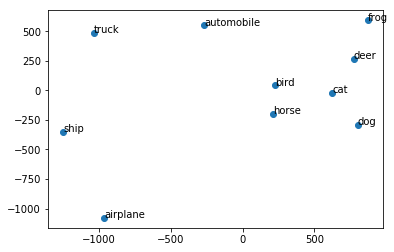

In [69]:
# compute the distances between mean images
distance = np.zeros((num_category,num_category))
for i in range(num_category):
    for j in range(i, num_category):
        # https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
        tmp = np.linalg.norm(mean_data[i] - mean_data[j])
        distance[i][j] = tmp
        distance[j][i] = tmp

mds = MDS(n_components=2, dissimilarity='euclidean')
mds_fit = mds.fit_transform(mean_data)
plt.scatter(mds_fit[:, 0], mds_fit[:, 1])
for i in range(num_category):
    plt.annotate(categories[i], (mds_fit[i,0],mds_fit[i,1]))
plt.show()